# 해운운임지수란?
* 세계 해운 시황을 대표하는 발틱운임지수(BDI 지수)는 영국 런던의 발틱해운거래소가 산출하는 건화물시황 운임지수

* 1985년부터 사용해온 BFI(Baltic Freight Index)를 대체하여 1999년 11월 1일부터 발표하고 있다. 1985년 1월 4일 운임 수준을 기준(1000)으로 삼고, 석탄ㆍ광석ㆍ곡물ㆍ건축 자재 등 포장 없이 벌크선으로 운송하는 원자재에 대한 운임을 평가

* 전 세계 26개 주요 항로의 선박유형별 벌크화물 운임과 용선료 등을 종합해서 산출

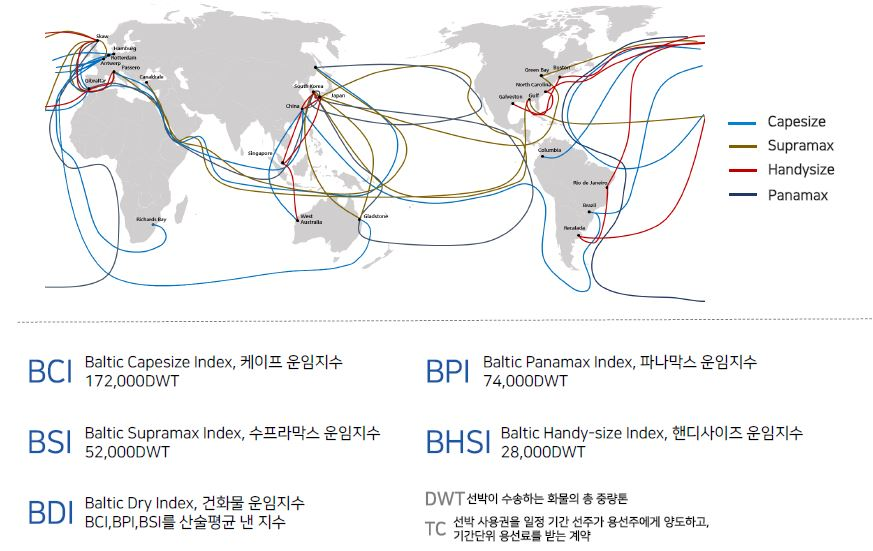

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/My Drive/Colab Notebooks'
bdi = pd.read_csv(data_path+'/Data/bdi.csv')
bdi.head()

,date,bdi
0,1999-Nov-01,1334
1,1999-Nov-02,1320
2,1999-Nov-03,1313
3,1999-Nov-04,1301
4,1999-Nov-05,1296


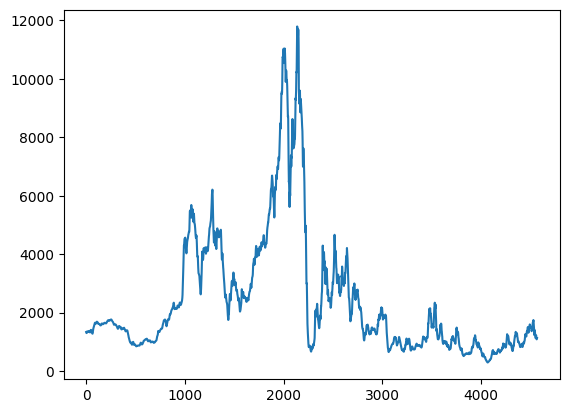

In [4]:
plt.plot(bdi['bdi'])
plt.show()

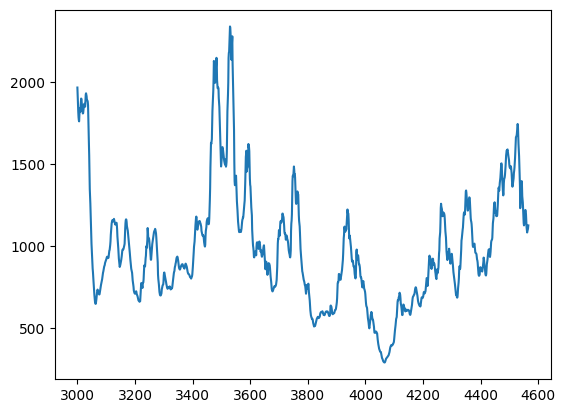

1567


In [5]:
bdi = bdi.iloc[3000:,:]
plt.plot(bdi['bdi'])
plt.show()
sc = MinMaxScaler()
dt = sc.fit_transform(bdi.iloc[:,1:2])
print(len(dt))

# 정상 시계열 vs 비정상 시계열

* 정상시계열

> 뚜렷한 추세가 없으며, 시계열의 평균이 시간 축에 평행한 경우

> 시계열의 변동이 시간의 흐름에 따라 일정하며, 시간이 지나도 분산이 일정한 경우

* 비정상시계열

> 뚜렷한 추세가 있으며, 시계열의 평균이 시간에 따라 다른 경우

> 특정한 변화 패턴이나, 계절성 그리고 분산이 시간에 따라 변하는 경우

* 비정상 시계열 데이터를 정상 시계열 데이터로 변화 시킨 후 모델링을 수행해야함

> 분산 변화: 로그변환, 제곱근 변환, 멱변환 등을 이용하여 분산을 안정화 시키는 방법

> 추세(결정적 추세, 확률적 추세) 의 패턴에 따라서 적용 방법이 다름


# 결정적 추세 vs 확률적 추세

* 결정적 추세: 시간에 의존하여 추세가 변하는 경우

* 확률적 추세: 인접한 값들 간에 강한 상관관계로 인해 추세가 존재하는 것처럼 보이는 경우

[시계열 분석 개요](https://m.blog.naver.com/hsj2864/220845474305)


# 시계열 모델링 방법

* AR 모형: Autoregressive (자기상관) 이란 어떤 Random Variable에 대해서 이전의 값이 이후에 영향을 주는 상황을 이야기하며, 변수 안에 규칙적인 Trend가 있을 때 자기 상관이 있다고 함.

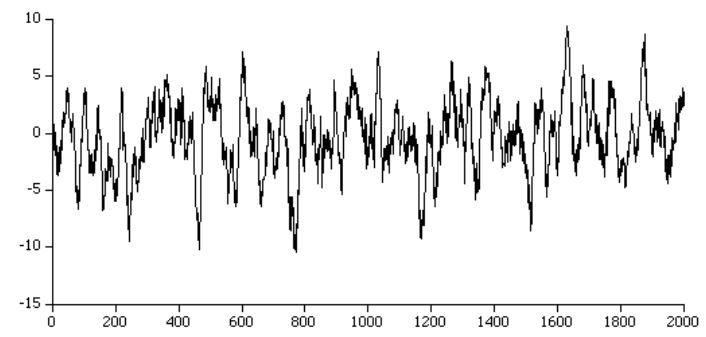

* MA 모형: Moving average(이동평균) 어떤 Random Variable 에 대해서 시간이 지날수록 평균값이 지속적으로 증가하거나 감소하는 경향성을 이동평균이라고 함.

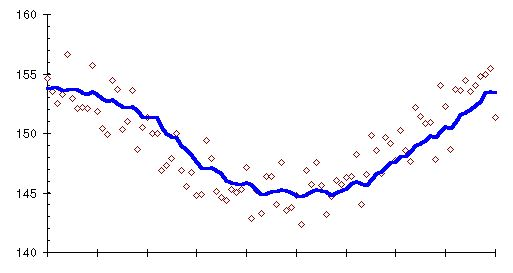

* Arima (Autoregressive Intergrated Moving Average) 모형: AR 모형과 모형에서 고려하는 요소와 과거의 데이터가 가지는 추세를 고려하여 시계열 모델링 하는 기법으로 3개의 파라미터로 (Arima(p,d,q)) 로 구성됨

> p: AR모형의 파라미터로써, p시점 전의 데이터가 현재의 데이터에 영향을 준다는 것을 의미함

> d: 정상시계열로 만들기 위해 필요한 차분의 수를 의미함

> q: MA 모형의 파라미터로써, 현재의 충격이 q 시점까지 영향을 남긴다는 것을 의미함

In [6]:
train_size= int(len(dt) * 0.67)
test_size = len(dt) - train_size
train = np.array(dt[0:train_size])
test = np.array(dt[train_size:])
print(len(train))
print(len(test))

1049
518


In [7]:
test

array([[3.85930630e-02],
       [3.56619443e-02],
       [3.32193454e-02],
       [3.17537860e-02],
       [3.12652662e-02],
       [3.12652662e-02],
       [2.68685882e-02],
       [2.29604299e-02],
       [1.70981925e-02],
       [1.31900342e-02],
       [1.17244748e-02],
       [9.77039570e-03],
       [6.35075721e-03],
       [3.90815828e-03],
       [3.41963850e-03],
       [1.46555936e-03],
       [4.88519785e-04],
       [0.00000000e+00],
       [0.00000000e+00],
       [4.88519785e-04],
       [2.44259893e-03],
       [5.37371764e-03],
       [8.30483635e-03],
       [1.12359551e-02],
       [1.22129946e-02],
       [1.27015144e-02],
       [1.36785540e-02],
       [1.56326331e-02],
       [1.70981925e-02],
       [1.80752320e-02],
       [1.90522716e-02],
       [2.05178310e-02],
       [2.19833903e-02],
       [2.54030288e-02],
       [2.88226673e-02],
       [3.12652662e-02],
       [3.71275037e-02],
       [4.20127015e-02],
       [4.59208598e-02],
       [4.78749389e-02],


In [8]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.0 MB/s eta 0:00:00


In [9]:
import pmdarima as pm
model = pm.auto_arima(train, error_action='ignore', trace=1,
                      suppress_warnings=True,
                      seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6679.193, Time=2.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5984.639, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6676.700, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6466.748, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5983.654, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6676.631, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6674.521, Time=0.60 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-6688.237, Time=3.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-6674.897, Time=5.78 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-6697.339, Time=5.94 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-6698.916, Time=6.41 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-6700.094, Time=6.74 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-6677.643, Time=1.33 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-6699.496, Time=1.42 sec
 ARIMA(5,1,1)(0,0,0

In [10]:
# Forecast
n_periods = len(test)
pred, confint = model.predict(n_periods=n_periods, return_conf_int=True)
print(pred)

[0.03669892 0.03407155 0.0320034  0.03024725 0.02873688 0.02752425
 0.02657207 0.0258171  0.02520112 0.02469688 0.02428811 0.02395997
 0.02369615 0.02348291 0.02331009 0.02317028 0.02305744 0.0229664
 0.02289286 0.02283341 0.02278537 0.02274655 0.02271521 0.02268989
 0.02266943 0.0226529  0.02263954 0.02262876 0.02262004 0.022613
 0.02260731 0.02260272 0.022599   0.022596   0.02259358 0.02259162
 0.02259004 0.02258876 0.02258773 0.0225869  0.02258622 0.02258568
 0.02258524 0.02258489 0.0225846  0.02258437 0.02258418 0.02258403
 0.02258391 0.02258381 0.02258373 0.02258366 0.02258361 0.02258357
 0.02258353 0.02258351 0.02258349 0.02258347 0.02258345 0.02258344
 0.02258343 0.02258342 0.02258342 0.02258341 0.02258341 0.02258341
 0.0225834  0.0225834  0.0225834  0.0225834  0.0225834  0.0225834
 0.02258339 0.02258339 0.02258339 0.02258339 0.02258339 0.02258339
 0.02258339 0.02258339 0.02258339 0.02258339 0.02258339 0.02258339
 0.02258339 0.02258339 0.02258339 0.02258339 0.02258339 0.02258339

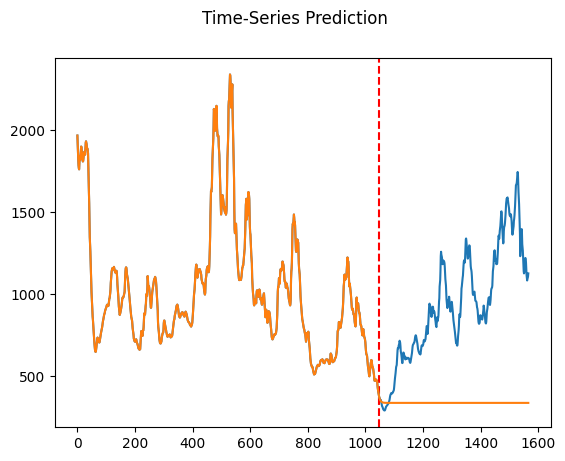

In [11]:
pred = pd.concat([pd.DataFrame(train),pd.DataFrame(pred)])
real = pd.concat([pd.DataFrame(train),pd.DataFrame(test)])
data_predict = pred.values
data_predict = sc.inverse_transform(data_predict)
real = sc.inverse_transform(real.values)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(real)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

매 Timestep마다 업데이트

In [12]:
model = pm.auto_arima(y = train        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과
                      , start_p = 0
                      , max_p = 3
                      , start_q = 0
                      , max_q = 3
                      , m = 1
                      , seasonal = False # 계절성 여부
                      , stepwise = True
                      , trace=True
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5984.639, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6676.700, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6466.748, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5983.654, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6678.725, Time=0.60 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-6677.643, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6674.521, Time=0.60 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6678.878, Time=0.71 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6676.631, Time=0.80 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6639.323, Time=2.39 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6679.193, Time=6.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-6688.237, Time=4.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-6674.897, Time=3.55 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-6698.274, Time=3.20 sec
 ARIMA(2,1,3)(0,0,0

In [13]:
from tqdm import tqdm

def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in tqdm(test):
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)


100%|██████████| 518/518 [05:47<00:00,  1.49it/s]


In [19]:
def mape(label, pred):
    return np.mean(np.abs((label-pred) / (label+1e-5)))

loss = mape(np.array(y_pred), test)
print(loss)

13.021626477345349


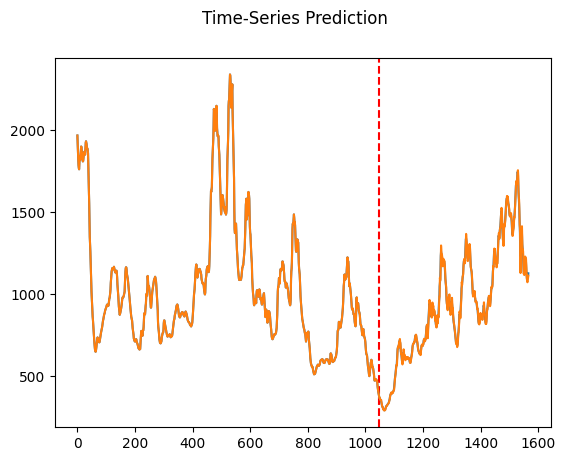

In [20]:
pred = pd.concat([pd.DataFrame(train),pd.DataFrame(y_pred)])
real = pd.concat([pd.DataFrame(train),pd.DataFrame(test)])
data_predict = pred.values
data_predict = sc.inverse_transform(data_predict)
real = sc.inverse_transform(real.values)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(real)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()